In [9]:

import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import os

#フォント設定
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
#plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 24 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 22 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 22 # 軸だけ変更されます


#軸設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛りの向き
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛りの向き

#軸大きさ
#plt.rcParams["xtick.major.width"] = 1.0             #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.0             #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0             #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0             #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 10               #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 10               #y軸主目盛り線の長さ
plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["axes.linewidth"] = 2.0                #囲みの太さ

#凡例設定
plt.rcParams["legend.fancybox"] = False  # 丸角OFF
plt.rcParams["legend.framealpha"] = 1  # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black'  # edgeの色を変更
plt.rcParams["legend.markerscale"] = 5 #markerサイズの倍率

In [16]:
# CSVファイルのパス
csv_path = '1st_trading_trend_2023.csv'

# CSVファイルから指定の列を読み取り
columns_to_read = [
'Kp','Ki','Kd',
'Med_purchase_num',
'Med_disposal_num', 'Total number of shares purchased', 
'Med_disposal_num','Total number of shares sold'
]

data = pd.read_csv(csv_path, usecols=columns_to_read)

# 変数名を短くする
short_column_names = [
    'Kp','Ki','Kd',
    'Med_purch_num',
    'Med_dis_num'
]
data.columns = short_column_names

# スピアマンの順位相関係数を計算
correlation_matrix = data.corr(method='spearman')

# 相関係数が0.4以上かつ1でない組み合わせを抽出
high_correlation_pairs = correlation_matrix[((abs(correlation_matrix) >= 0) & (abs(correlation_matrix) < 1))].stack().reset_index()
high_correlation_pairs.columns = ['Variable1', 'Variable2', 'Correlation']

# 重複を削除
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['Variable1'] < high_correlation_pairs['Variable2']]

# フィルタリングされた組み合わせに対して散布図を作成
#output_dir = 'Zemi_2nd_scatter_plots'
#os.makedirs(output_dir, exist_ok=True)

for index, row in high_correlation_pairs.iterrows():
    variable1 = row['Variable1']
    variable2 = row['Variable2']
    correlation = row['Correlation']
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[variable1], y=data[variable2])
    plt.title(f'Spearman Correlation: {correlation:.2f}')
    plt.xlabel(variable1)
    plt.ylabel(variable2)
    
    # 散布図を保存
    #output_path = os.path.join(output_dir, f'zemi_2nd_{variable1}_vs_{variable2}.png')
    #plt.savefig(output_path)
    plt.close()

# 抽出された組み合わせと相関係数をCSVファイルに保存
#high_correlation_pairs.to_csv('1st_ScatterPlot_Zemi.csv', index=False)

print("相関係数が0.4以上の組み合わせの情報と散布図が 'high_correlation_pairs.csv' および 'scatter_plots' ディレクトリに保存されました。")

相関係数が0.4以上の組み合わせの情報と散布図が 'high_correlation_pairs.csv' および 'scatter_plots' ディレクトリに保存されました。


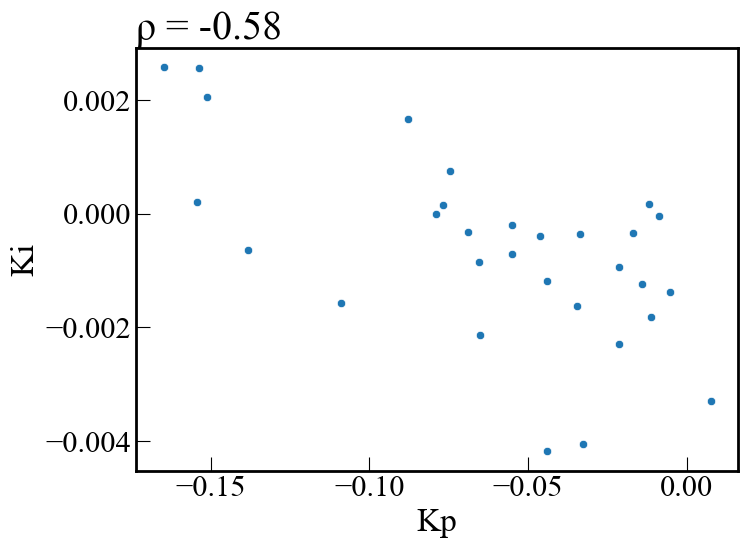

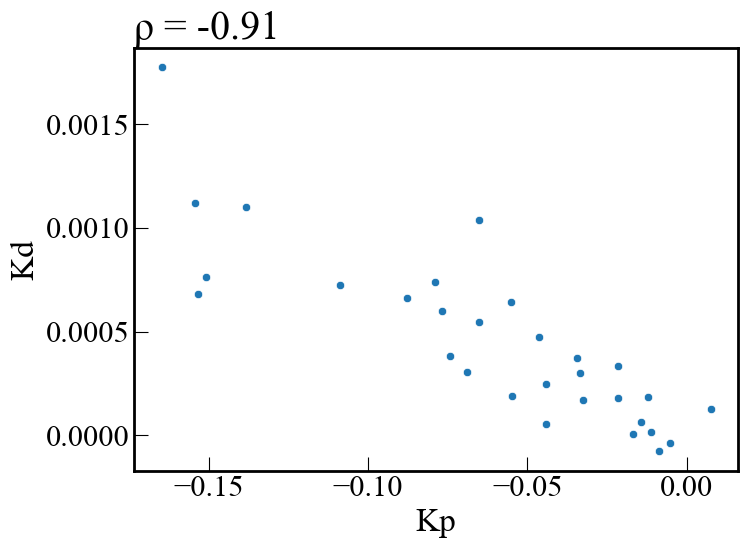

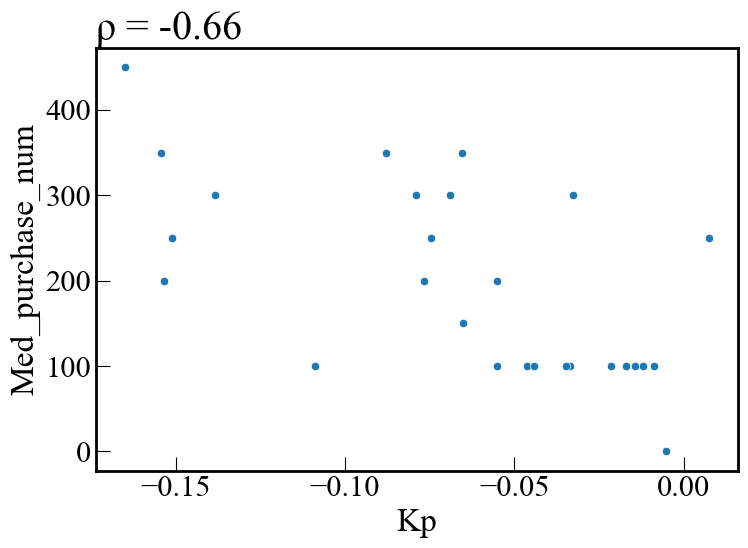

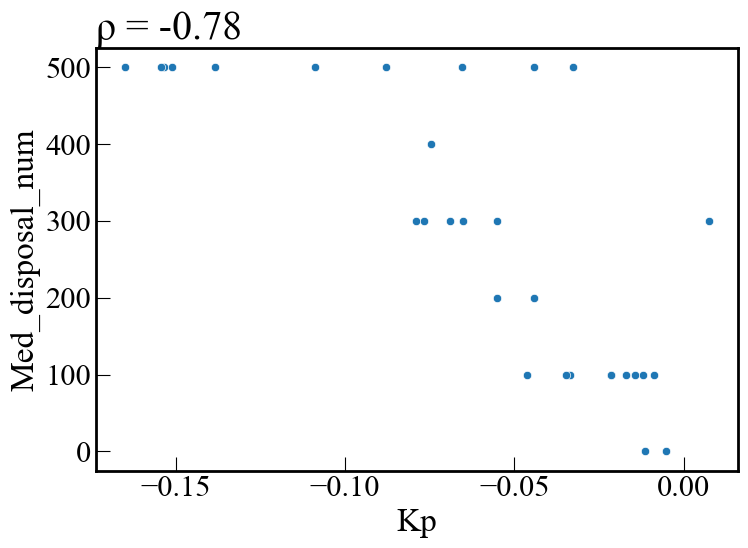

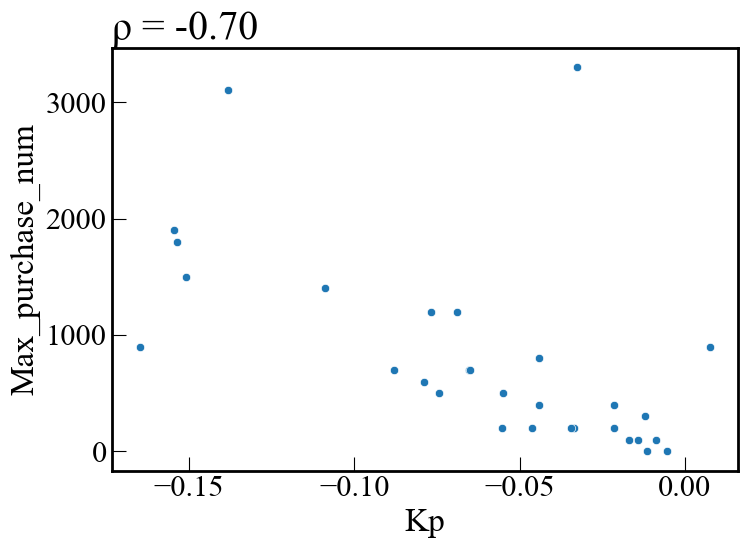

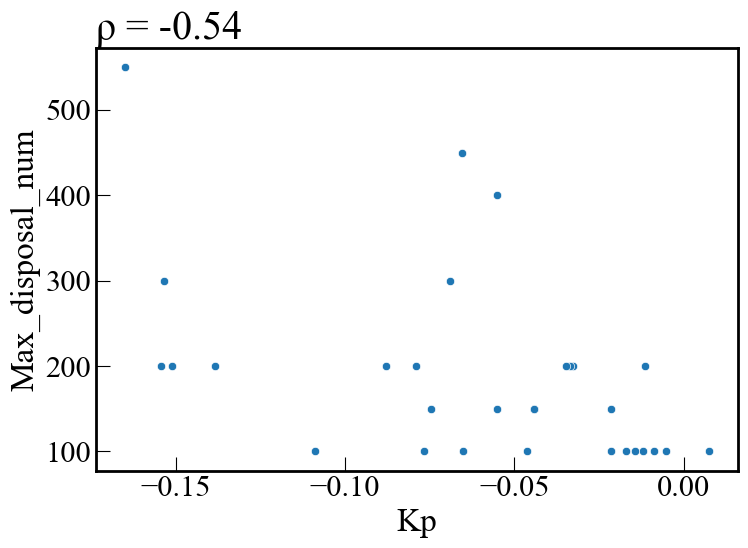

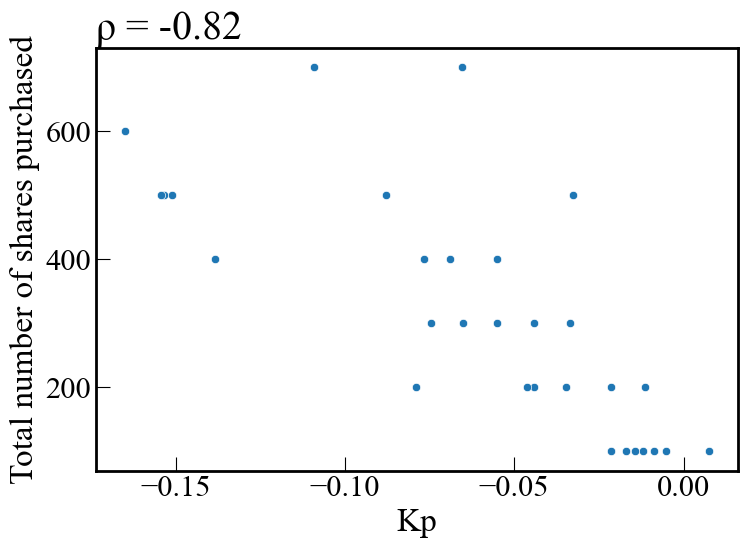

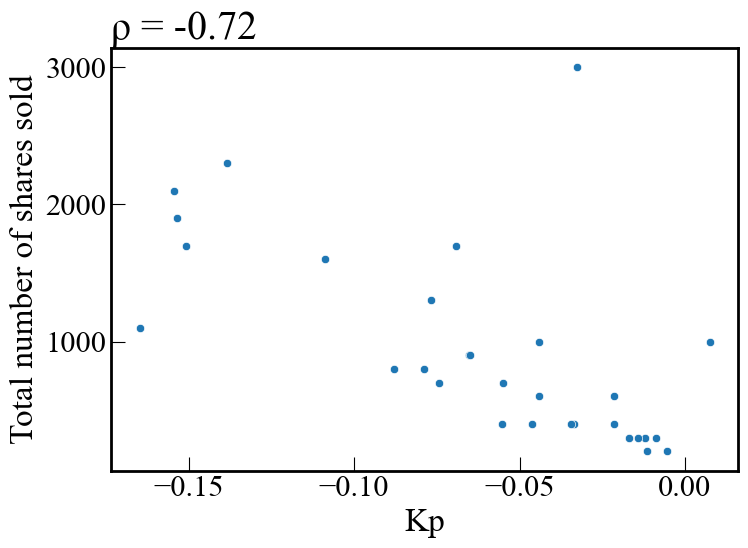

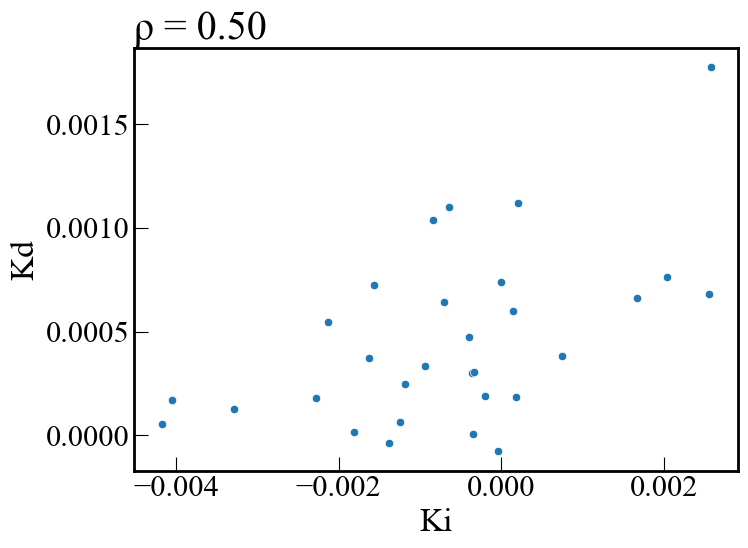

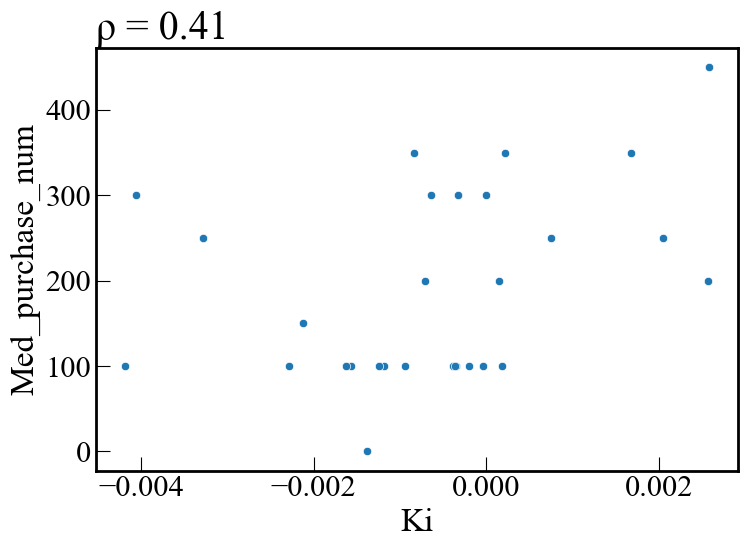

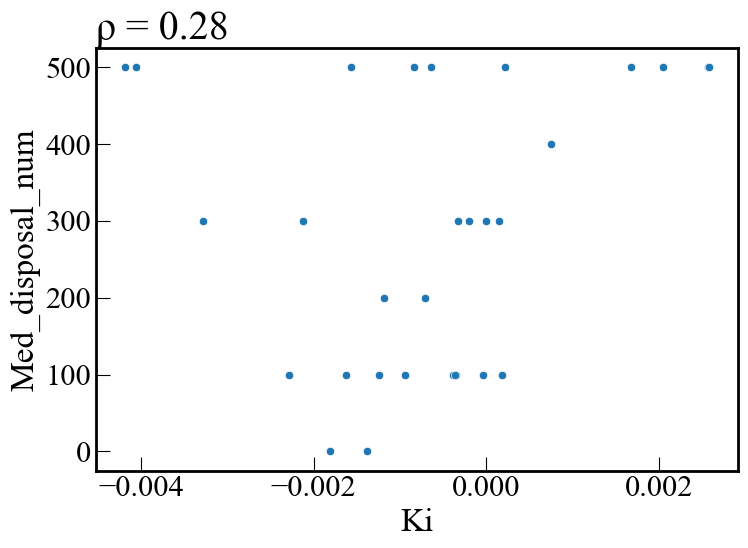

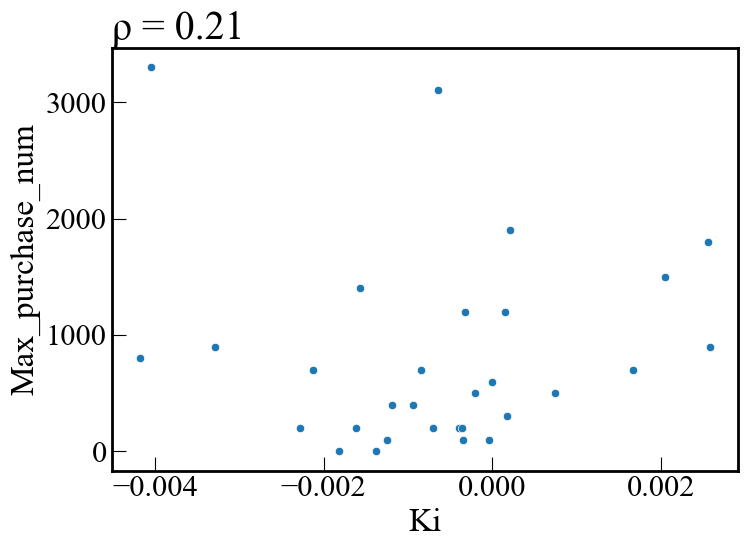

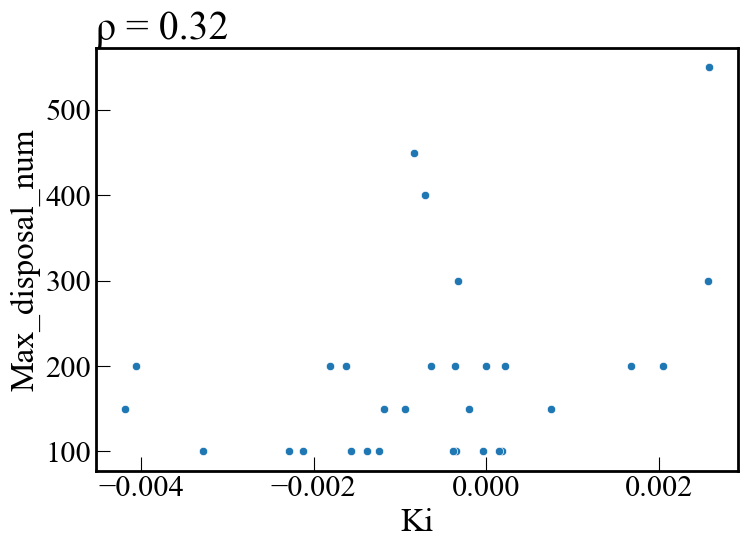

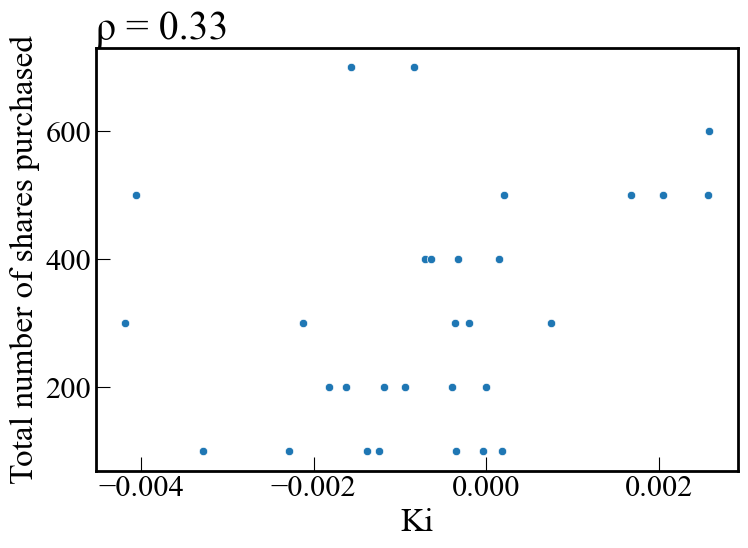

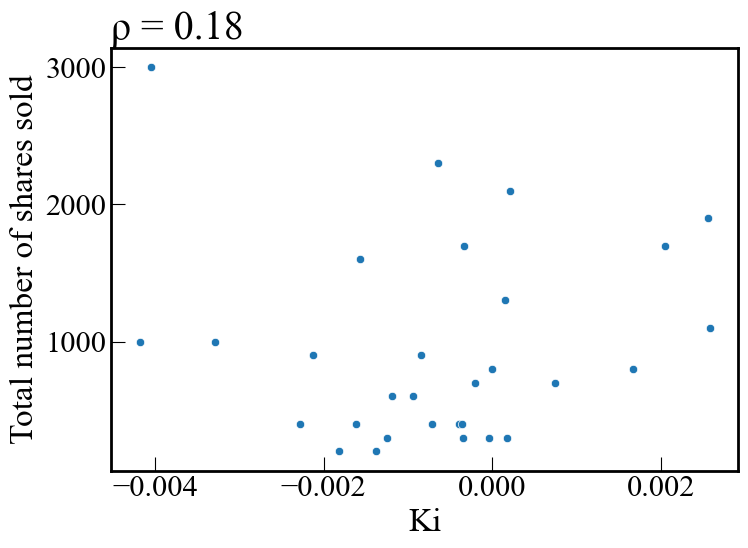

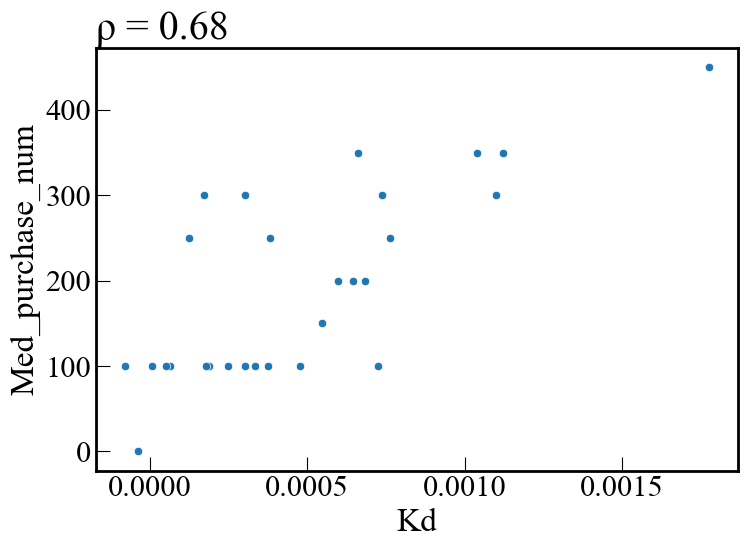

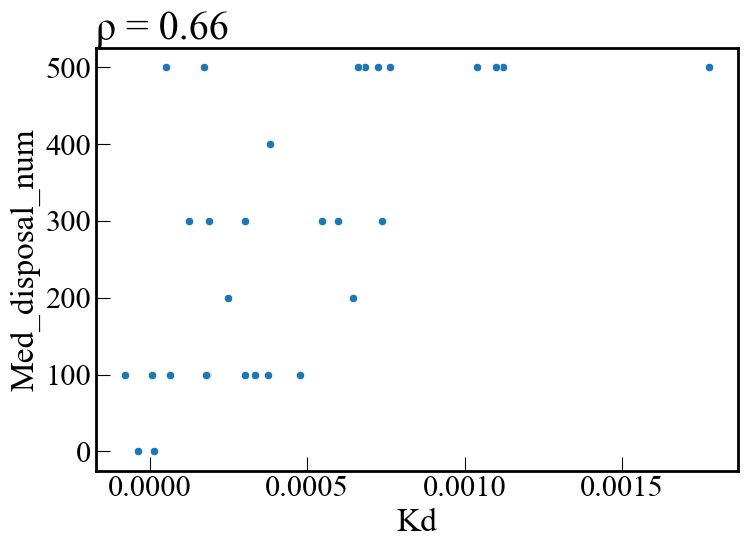

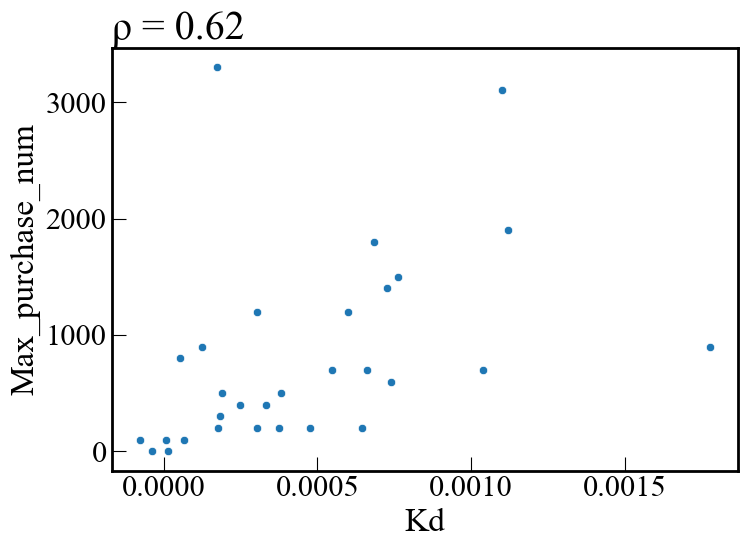

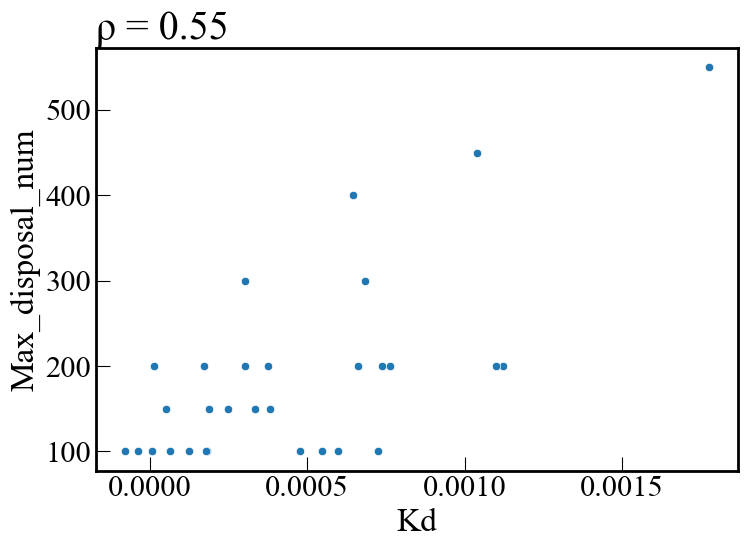

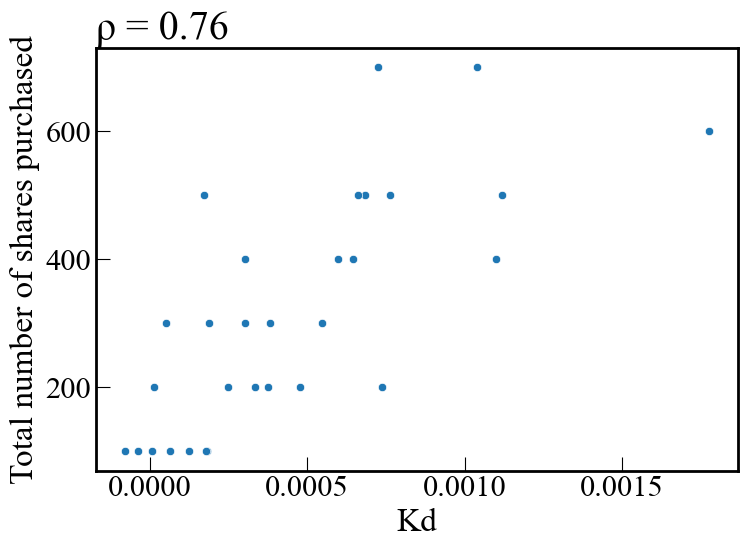

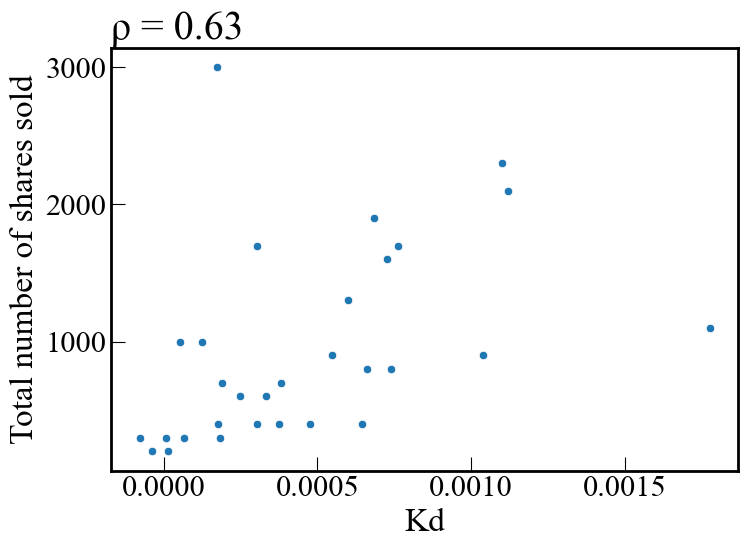

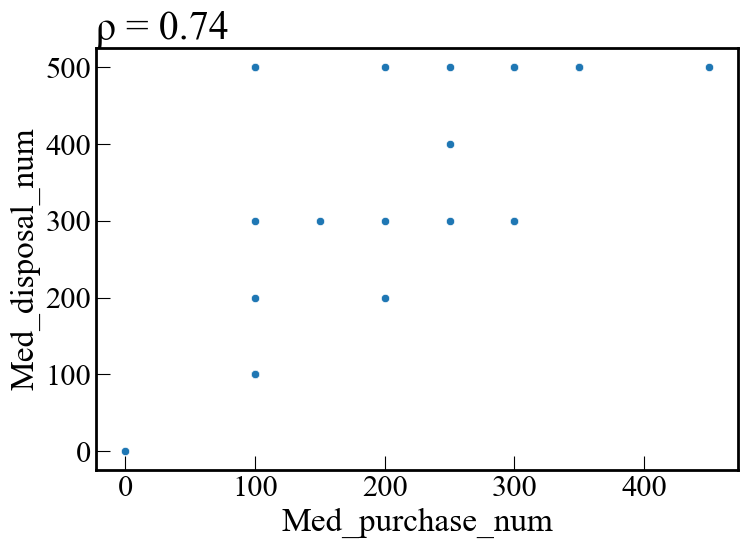

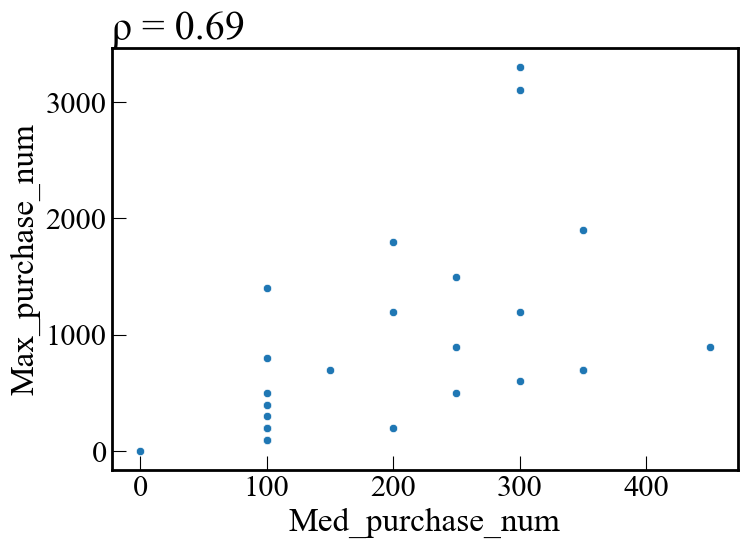

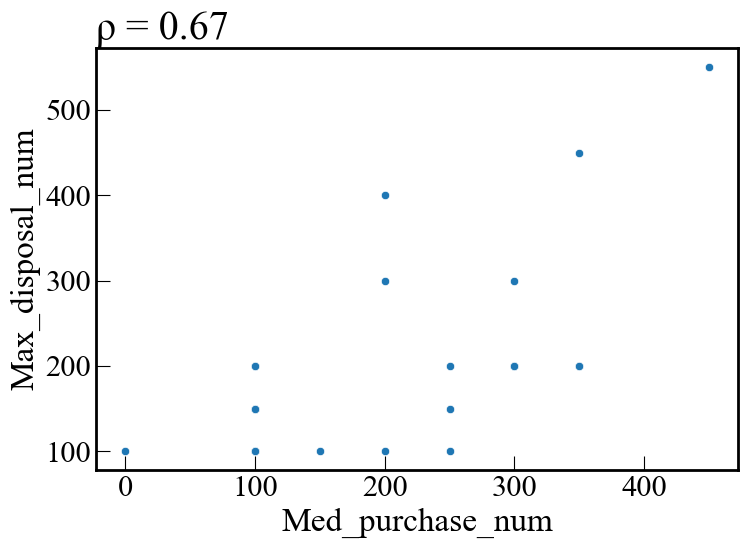

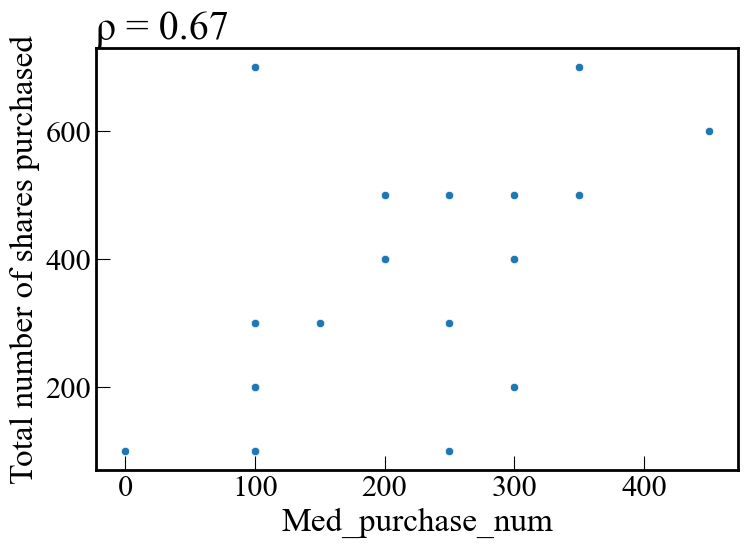

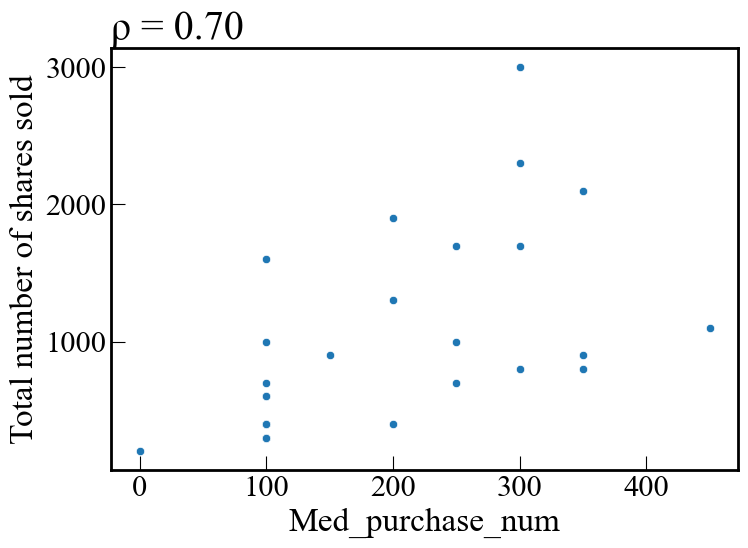

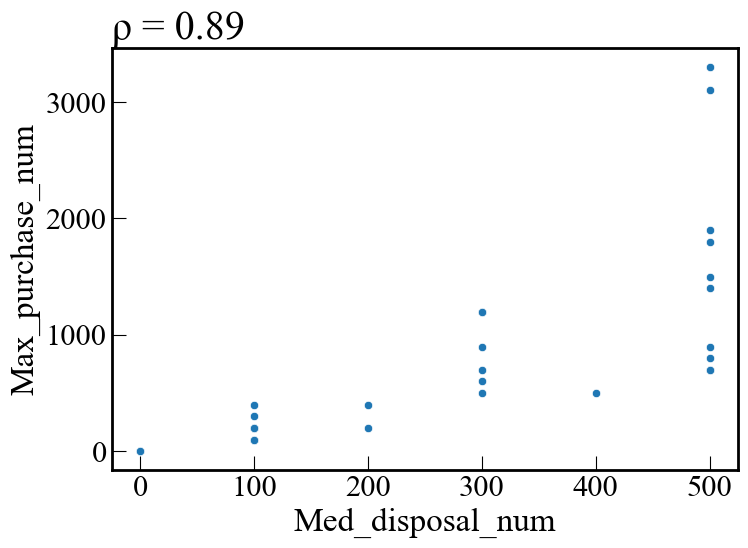

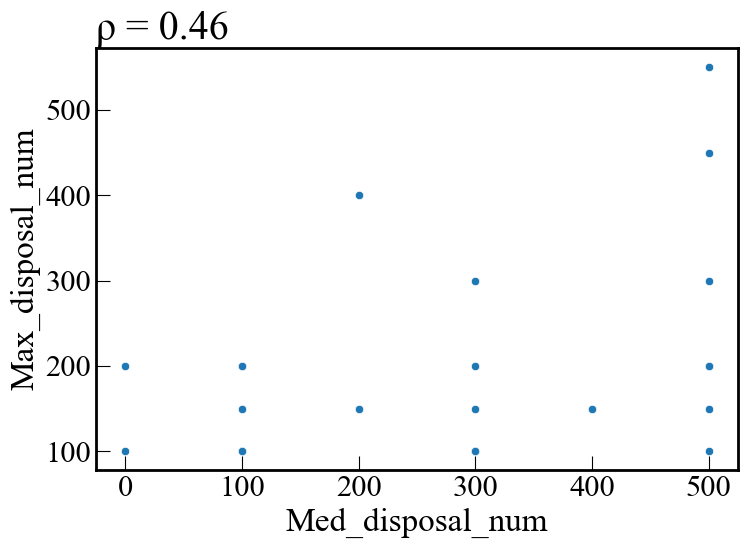

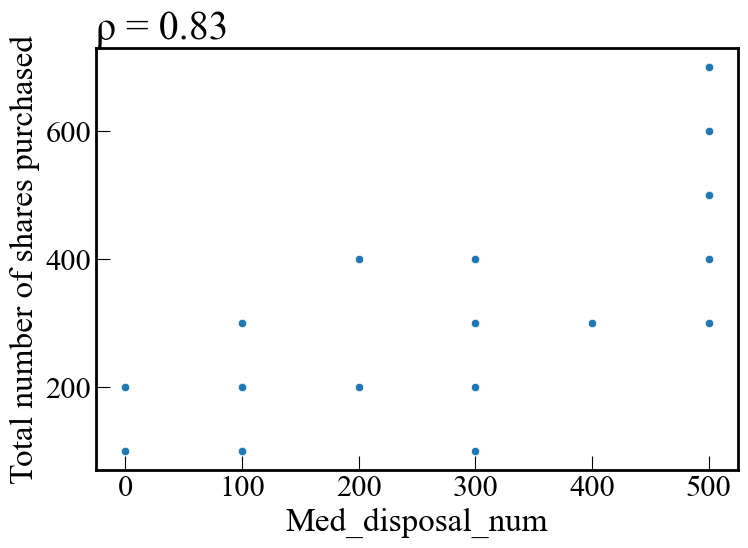

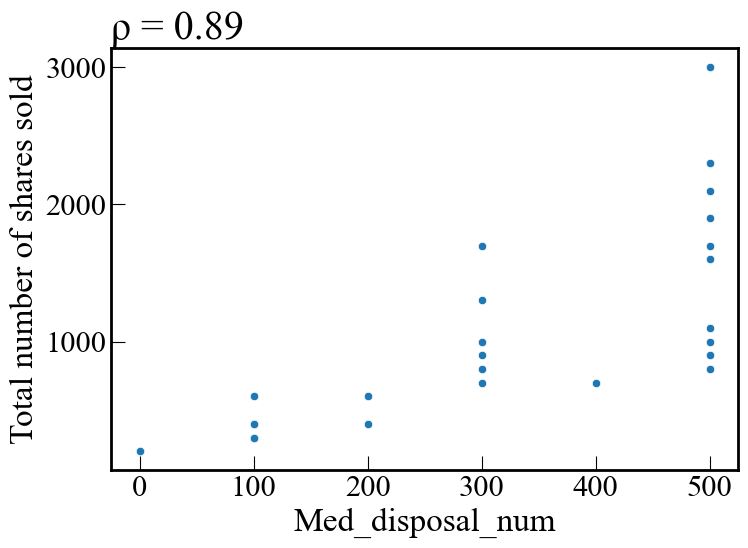

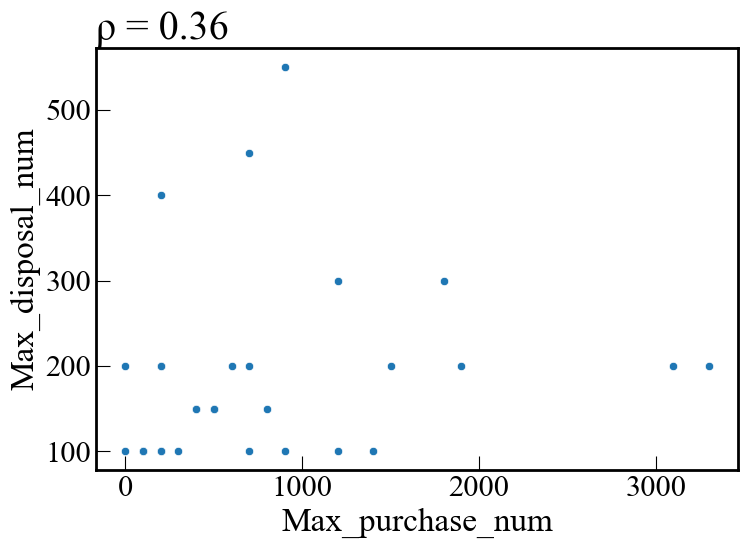

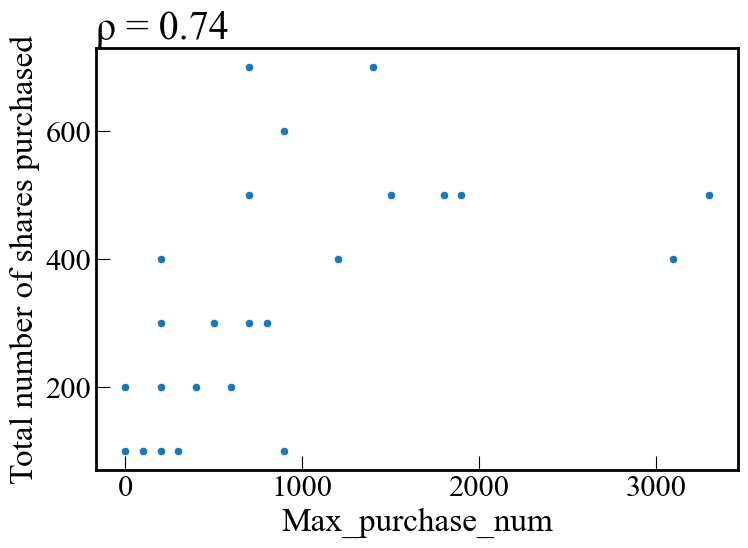

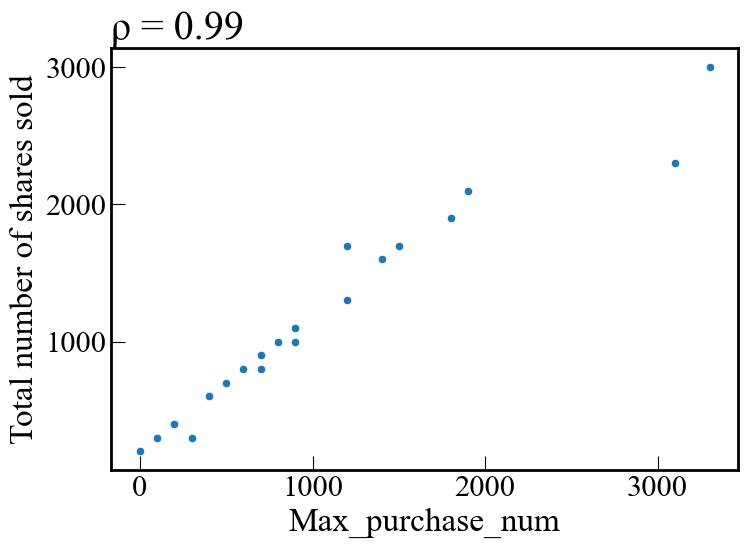

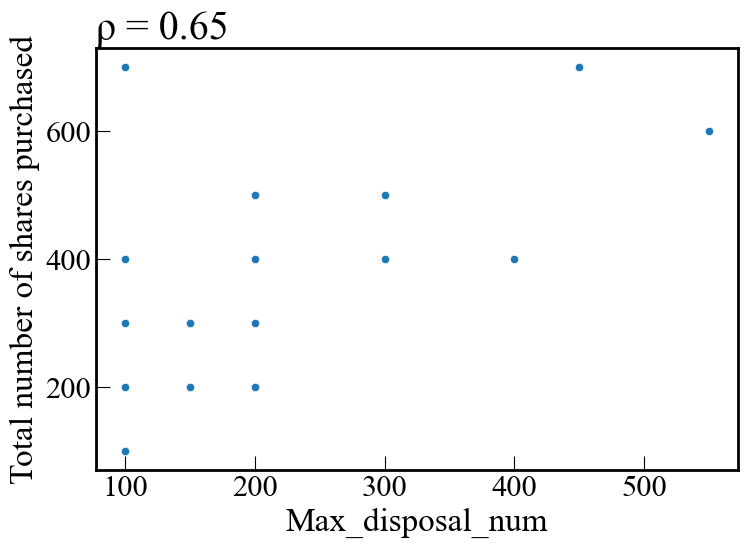

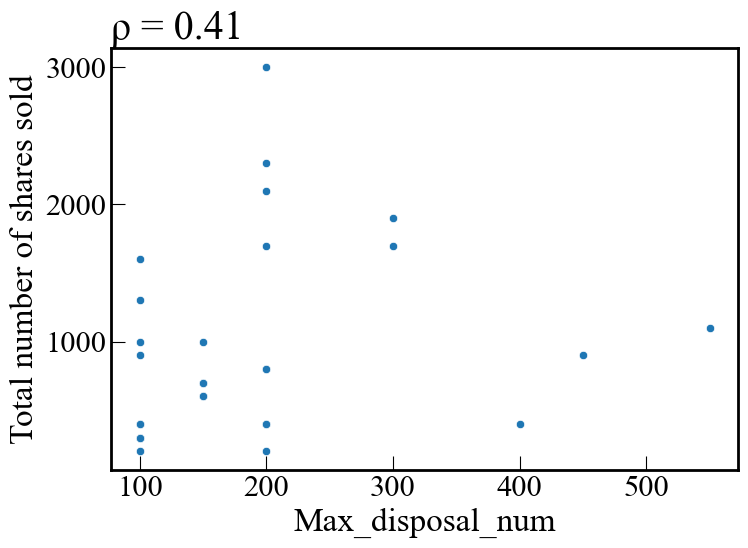

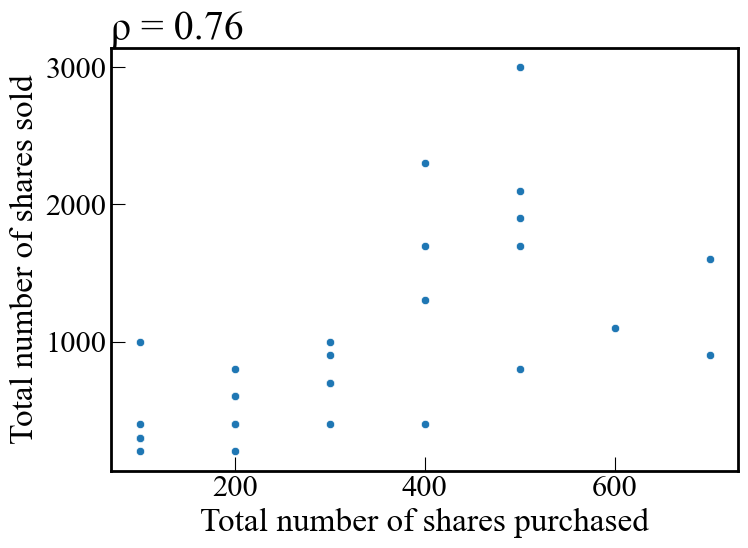

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSVファイルのパス
csv_path = '2nd_trading_trend_2023.csv'

# CSVファイルから指定の列を読み取り
columns_to_read = [
    'Kp', 'Ki', 'Kd',
    'Med_purchase_num',
    'Med_disposal_num',
    'Max_purchase_num',
    'Max_disposal_num',
    'Total number of shares purchased', 
    'Total number of shares sold'
]

data = pd.read_csv(csv_path, usecols=columns_to_read)

# 変数名を短くする
short_column_names = [
    'Kp', 'Ki', 'Kd',
    'Med_purchase_num',
    'Med_disposal_num',
    'Max_purchase_num',
    'Max_disposal_num',
    'Total number of shares purchased', 
    'Total number of shares sold'

]
#    'Median of the purchased quantity of stocks(shares)',
    #'Median of the purchased quantity of stocks(shares)'
data.columns = short_column_names

# スピアマンの順位相関係数を計算
correlation_matrix = data.corr(method='spearman')

# すべての組み合わせに対して散布図を作成
for i in range(len(short_column_names)):
    for j in range(i+1, len(short_column_names)):
        variable1 = short_column_names[i]
        variable2 = short_column_names[j]
        correlation = correlation_matrix.loc[variable1, variable2]
        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data[variable1], y=data[variable2])
        plt.title(f'ρ = {correlation:.2f}',loc='left')
        plt.xlabel(variable1)
        plt.ylabel(variable2)
        plt.tight_layout()
        # 散布図を表示
        plt.show()


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSVファイルのパス
csv_path = '2nd_trading_trend_2023.csv'

# CSVファイルから指定の列を読み取り
columns_to_read = [
    'Kp', 'Ki', 'Kd',
    'Med_purchase_num',
    'Med_disposal_num',
    'Max_purchase_num',
    'Max_disposal_num',
    'Total number of shares purchased', 
    'Total number of shares sold'
]

data = pd.read_csv(csv_path, usecols=columns_to_read)

# 変数名を短くする
short_column_names = [
    'Kp', 'Ki', 'Kd',
    'Med_purchase_num',
    'Med_disposal_num',
    'Max_purchase_num',
    'Max_disposal_num',
    'Total number of shares purchased', 
    'Total number of shares sold'
]

# ラベル名にしたい名前をリストにセット
custom_labels = [
    'Kp',
    'Ki',
    'Kd',
    'Median of the purchased quantity of stocks (shares)',
    'Maximum quantity of the purchased stocks (shares)',
    'Total quantity of purchased stocks (shares)',
    'Median of the sold quantity of stocks (shares)',
    'Maximum quantity of the sold stocks (shares)',
    'Total quantity of sold stocks (shares)'
]

data.columns = short_column_names
# Create a folder to save images if it doesn't exist
output_folder = 'scatter_plots'
os.makedirs(output_folder, exist_ok=True)
# スピアマンの順位相関係数を計算
correlation_matrix = data.corr(method='spearman')

# すべての組み合わせに対して散布図を作成
for i in range(len(short_column_names)):
    for j in range(i+1, len(short_column_names)):
        variable1 = short_column_names[i]
        variable2 = short_column_names[j]
        correlation = correlation_matrix.loc[variable1, variable2]
        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data[variable1], y=data[variable2])
        plt.title(f'ρ = {correlation:.2f}', loc='left')
        plt.xlabel(custom_labels[i])
        plt.ylabel(custom_labels[j])
        plt.tight_layout()
 # Save the figure in the output folder
        output_file_path = os.path.join(output_folder, f'scatter_plot_{variable1}_{variable2}.png')
        plt.savefig(output_file_path)

 # Close the plot to prevent overlapping plots
        plt.close()
        # 散布図を表示
        plt.show()
print(f"Scatter plots saved in the '{output_folder}' folder.")        


Scatter plots saved in the 'scatter_plots' folder.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSVファイルのパス
csv_path = '1st_trading_trend_2023.csv'

# CSVファイルから指定の列を読み取り
columns_to_read = [
    'Kp', 'Ki', 'Kd',
    'Med_purchase_num',
    'Med_disposal_num'
]

data = pd.read_csv(csv_path, usecols=columns_to_read)

# 変数名を短くする
short_column_names = [
    'Kp', 'Ki', 'Kd',
    'Median of the purchased quantity of stocks (yen)',
    'Median of the purchased quantity of stocks (yen)'
]

data.columns = short_column_names

# スピアマンの順位相関係数を計算
correlation_matrix = data.corr(method='spearman')

# すべての組み合わせに対して散布図を作成
for i in range(len(short_column_names)):
    for j in range(i+1, len(short_column_names)):
        #variable1 = short_column_names[i]
        #variable2 = short_column_names[j]
        #correlation = correlation_matrix.loc[variable1, variable2]
        
        # CSVに相関係数を追加
        correlation_data = pd.DataFrame([[variable1, variable2, correlation]], columns=['Variable1', 'Variable2', 'Correlation'])
        correlation_csv_path = 'correlation_results.csv'
        correlation_data.to_csv(correlation_csv_path, mode='a', header=not pd.read_csv(correlation_csv_path).empty, index=False)

        ##sns.scatterplot(x=data[variable1], y=data[variable2])
        #plt.title(f'{variable1} vs {variable2}\nSpearman Correlation: {correlation:.2f}')
        #plt.xlabel(variable1)
        #plt.ylabel(variable2)
        
        # 散布図を表示
        #plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt

# CSVファイルのパス
csv_path = '2nd_trading_trend_2023.csv'
# Create a folder to save images if it doesn't exist
output_folder = '論文兼発表用_plot_1st'

#フォント設定
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
#plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 24 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 22 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 22 # 軸だけ変更されます


#軸設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛りの向き
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛りの向き

#軸大きさ
#plt.rcParams["xtick.major.width"] = 1.0             #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.0             #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0             #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0             #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 10               #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 10               #y軸主目盛り線の長さ
plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["axes.linewidth"] = 2.0                #囲みの太さ

#凡例設定
plt.rcParams["legend.fancybox"] = False  # 丸角OFF
plt.rcParams["legend.framealpha"] = 1  # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black'  # edgeの色を変更
plt.rcParams["legend.markerscale"] = 5 #markerサイズの倍率

# CSVファイルのパス
#csv_path = '2nd_trading_trend_2023.csv'

# CSVファイルから指定の列を読み取り
columns_to_read = [
    'Kp', 'Ki', 'Kd',
    'Med_purchase_num',
    'Med_disposal_num',
    'Max_purchase_num',
    'Max_disposal_num',
    'Total number of shares purchased', 
    'Total number of shares sold'
]

data = pd.read_csv(csv_path, usecols=columns_to_read)

# 変数名を短くする
short_column_names = [
    'Kp', 'Ki', 'Kd',
    'Med_purchase_num',
    'Med_disposal_num',
    'Max_purchase_num',
    'Max_disposal_num',
    'Total number of shares purchased', 
    'Total number of shares sold'
]

# ラベル名にしたい名前をリストにセット
custom_labels = [
    'Kp',
    'Ki',
    'Kd',
    'Median of the purchased quantity of stocks (shares)',
    'Maximum quantity of the purchased stocks (shares)',
    'Total quantity of purchased stocks (shares)',
    'Median of the sold quantity of stocks (shares)',
    'Maximum quantity of the sold stocks (shares)',
    'Total quantity of sold stocks (shares)'
]
data.columns = short_column_names

os.makedirs(output_folder, exist_ok=True)
# スピアマンの順位相関係数を計算
correlation_matrix = data.corr(method='spearman')

# すべての組み合わせに対して散布図を作成
for i in range(len(short_column_names)):
    for j in range(i+1, len(short_column_names)):
        variable1 = short_column_names[i]
        variable2 = short_column_names[j]
        correlation = correlation_matrix.loc[variable1, variable2]
        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data[variable1], y=data[variable2])
        plt.title(f'ρ = {correlation:.2f}', loc='left')
        plt.xlabel(custom_labels[i])
        plt.ylabel(custom_labels[j])
        plt.tight_layout()
 # Save the figure in the output folder
        output_file_path = os.path.join(output_folder, f'scatter_plot_{variable1}_{variable2}.png')
        plt.savefig(output_file_path)

 # Close the plot to prevent overlapping plots
        plt.close()
        # 散布図を表示
        plt.show()
print(f"Scatter plots saved in the '{output_folder}' folder.")

